In [3]:
pip install catboost


  Using cached tenacity-8.0.1-py3-none-any.whl (24 kB)


In [24]:
pip install wordcloud

In [39]:
import numpy as np
import pandas as pd
import pandas as pd
pd.options.display.max_columns=100
from sklearn.svm import SVC
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.naive_bayes import MultinomialNB
import nltk
from collections import Counter
from nltk import word_tokenize
from nltk.corpus import stopwords
wn = nltk.WordNetLemmatizer()
from nltk.stem import PorterStemmer
stemming =PorterStemmer()
stopwords = nltk.corpus.stopwords.words('english')
#ps = nltk.PorterStemmer()
import re
import string
from bs4 import BeautifulSoup
from string import punctuation
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from sklearn.metrics import *
from sklearn.model_selection import *
import warnings
warnings.simplefilter('ignore')
import gc
from scipy.special import softmax
from sklearn.model_selection import train_test_split
import datetime as dt
import time
import nltk
from string import punctuation
from nltk.tokenize import punkt
from nltk.tokenize import word_tokenize
from nltk import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from catboost import CatBoostRegressor
from catboost import CatBoostClassifier
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, make_scorer
from time import time
from catboost import CatBoostRegressor
from catboost import CatBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
import catboost as ctb

import joblib as jb

In [5]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kyusvalent\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kyusvalent\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
data =pd.read_csv('labeled_tweets.csv')

In [7]:
data.drop_duplicates(inplace = True)
data.drop(['id'], axis = 1, inplace = True)

In [8]:
data.sample(4,random_state=40)

,label,full_text
7626,Non-offensive,Like when @GMShivers said that only industry n...
5192,Non-offensive,I'm so sick of Kat n Andre scraping through by...
4091,Non-offensive,"""Follow #ElieEliaWorld\nايلي ايليا\nTwi\nhtt..."
10855,Non-offensive,&#8220;@Queendev_: My leave out is trash &#128...


In [9]:
data.head()

,label,full_text
0,Offensive,So Drasko just said he was impressed the girls...
2,Offensive,Drasko they didn't cook half a bird you idiot ...
4,Offensive,Hopefully someone cooks Drasko in the next ep ...
6,Offensive,of course you were born in serbia...you're as ...
7,Offensive,These girls are the equivalent of the irritati...


In [10]:
data.shape

(11877, 2)

In [11]:
data.columns

Index(['label', 'full_text'], dtype='object')

In [12]:
# No of missing values
data.isnull().sum()

label        0
full_text    0
dtype: int64

In [13]:
data['label'].value_counts()

Non-offensive    6822
Offensive        5055
Name: label, dtype: int64

In [14]:
data['label']=data['label'].map({'Non-offensive':0,'Offensive':1 })

In [15]:
data.dtypes

label         int64
full_text    object
dtype: object

In [16]:
non_Bullying = data[data['label']==0]
Bullying = data[data['label']==1]

In [17]:
def What_Happened(data):
    negative = data[data['label']==1]
    positive = data[data['label']==0]
    neutral = data[data['label']==2]
    print('==' * 15, 'CyberBullying & Non-cyberbullying Tweet ANALYSIS', '==' * 15)
    print('\n')
    print()
    print('Total Labelled Tweets were: ', data.shape[0])
    print('non_bullying Tweets: ',len(non_Bullying))
    print('bullying Tweets: ', len(Bullying))

In [18]:
What_Happened(data)

============================== CyberBullying & Non-cyberbullying Tweet ANALYSIS ==============================



Total Labelled Tweets were:  11877
non_bullying Tweets:  6822
bullying Tweets:  5055


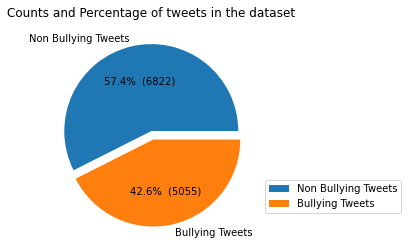

In [19]:
#Function to plot pie chart with specific format
def make_autopct(sizes):
    def my_autopct(pct):
        total = sum(sizes)
        val = int(round(pct*total/100.0))
        return '{p:.1f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct
explode = (0,0.1)
fig1,ax1 = plt.subplots()
sizes = list((len(non_Bullying), len(Bullying)))
lb = ['Negative Tweets', 'Positive Tweets',  'Neutral Tweets']
lb = ['Non Bullying Tweets', 'Bullying Tweets']

plt.pie(sizes, labels=lb, explode = explode, autopct=make_autopct(sizes))
plt.title('Counts and Percentage of tweets in the dataset')
ax1.legend(loc='best',bbox_to_anchor=(1,0.3))
plt.show()

In [20]:
import string
def word_counts(sentence):
    return len(sentence)
data['word counts'] = data['full_text'].apply(word_counts)

#Estimate the percentage of punctuation marks in each tweet
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['punct%'] = data['full_text'].apply(lambda x: count_punct(x))

## WORD CLOUD ANALYSIS

In [21]:
def gettext(tweet):
    text = BeautifulSoup(tweet, 'html.parser')
    return text.get_text()

def removehurls(tweet):
    return re.sub(r'http\S+', '', tweet)

def removesymbols(tweet):
    re.sub(r'^\x00-\x7F+', '', tweet)
    return re.sub('[@!.,\/&)?:#...-'']', '', tweet)

def removestopwords(tweet):
    new_message = []
    tweet = tweet.lower()
    tweet = word_tokenize(tweet)
    sw = stopwords.words('english')
    for msg in tweet:
        if msg not in sw:
            new_message.append(msg) 
    return ' '.join(new_message)

def preparetweet(tweet):
    tweet = gettext(tweet)
    tweet = removehurls(tweet)
    tweet = removesymbols(tweet)
    tweet = removestopwords(tweet)
    return tweet

In [22]:
# For Analysis purpose; removing noise such as stop words, urls and symbols etc from the tweets
data['processed_tweet'] = data['full_text'].apply(preparetweet)
data['word counts'] = data['processed_tweet'].apply(word_counts)
data

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:417: MarkupResemblesLocatorWarning: "http://t.co/daznQZR8Te" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:417: MarkupResemblesLocatorWarning: "http://t.co/dALZL6ZuOV" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:417: MarkupResemblesLocatorWarning: "http://t.co/NXgtqSlchG" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
C:\ProgramData\Anaconda3\lib

,label,full_text,word counts,punct%,processed_tweet
0,1,So Drasko just said he was impressed the girls...,68,3.7,drasko said impressed girls cooked half chicke...
2,1,Drasko they didn't cook half a bird you idiot ...,35,4.9,drasko n't cook half bird idiot mkr
4,1,Hopefully someone cooks Drasko in the next ep ...,42,2.3,hopefully someone cooks drasko next ep mkr
6,1,of course you were born in serbia...you're as ...,49,8.1,course born serbiayou 're fucked serbian film mkr
7,1,These girls are the equivalent of the irritati...,72,4.9,girls equivalent irritating asian girls couple...
...,...,...,...,...,...
11957,1,@BitchImFancy lol so retarded,25,3.8,bitchimfancy lol retarded
11958,1,@BitchImaStunna @VeshaaCouture lmao bitch shut up,44,4.5,bitchimastunna veshaacouture lmao bitch shut
11959,1,@BitchMedia what's up my bitches?! Shout out f...,56,8.7,bitchmedia 's bitches shout momz cali keep doi...
11960,1,@Bitcheslovestar The only one of Mary's friend...,69,20.9,bitcheslovestar one mary 's friends like bitch...


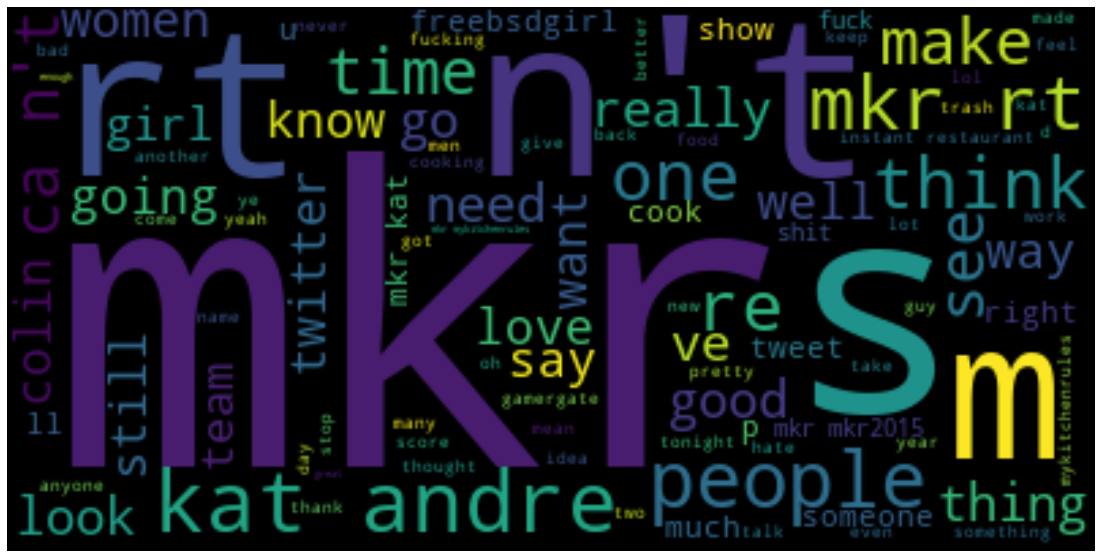

In [25]:
# View of overtly mentioned non bullying words using Wordcloud
from wordcloud import WordCloud, STOPWORDS


# Create a word cloud image
wc = WordCloud(background_color="black", max_words=100, 
               stopwords=STOPWORDS, contour_width=3, contour_color='black')

non_bullying_words = ' '.join(list(data[data['label'] == 0]['processed_tweet']))
# Generate a wordcloud
wc.generate(non_bullying_words)


# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

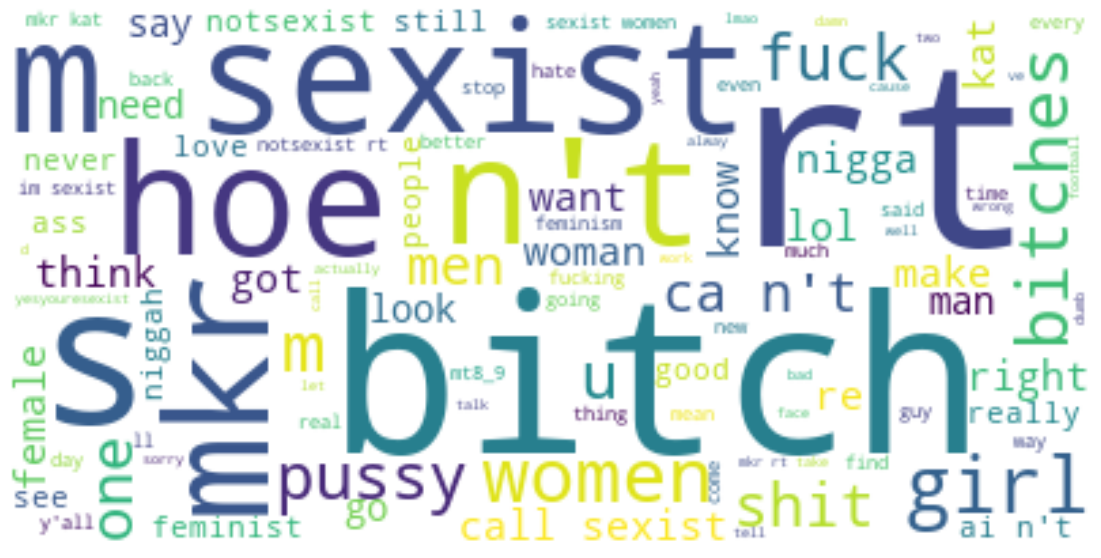

In [26]:
#To do this, we need WORDCLOUD Library
from wordcloud import WordCloud, STOPWORDS

# Create a word cloud image
wc = WordCloud(background_color="white", max_words=100,
               stopwords=STOPWORDS, contour_width=3, contour_color='black')

bullying_words = ' '.join(list(data[data['label'] == 1]['processed_tweet']))
# Generate a wordcloud
wc.generate(bullying_words)

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## UNIGRAM ANALYSIS

<AxesSubplot:>

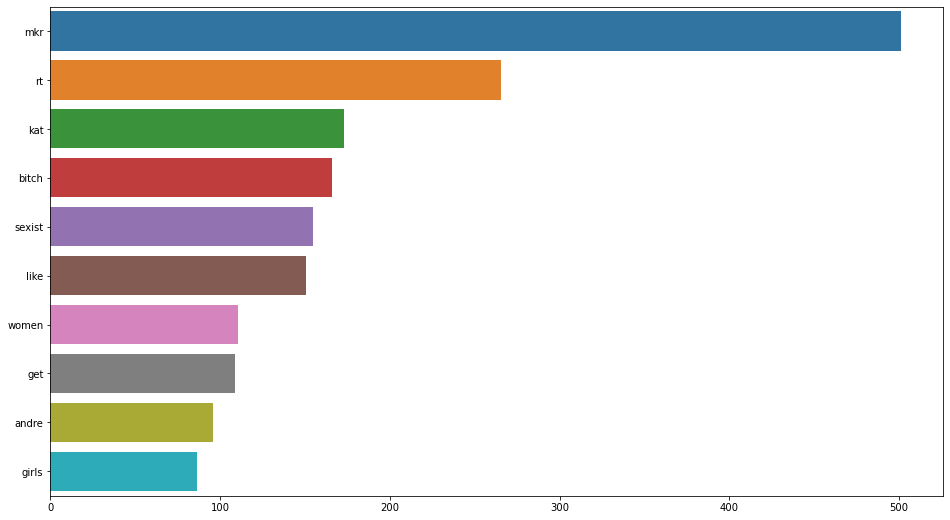

In [27]:
def get_top_text_ngrams(corpus, n, g):
    vec = TfidfVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
plt.figure(figsize = (16,9))
frequent_words = get_top_text_ngrams(data.processed_tweet,10,1)
frequent_words = dict(frequent_words)
sns.barplot(x=list(frequent_words.values()),y=list(frequent_words.keys()))

# BIVARIATE ANALYSIS

<AxesSubplot:>

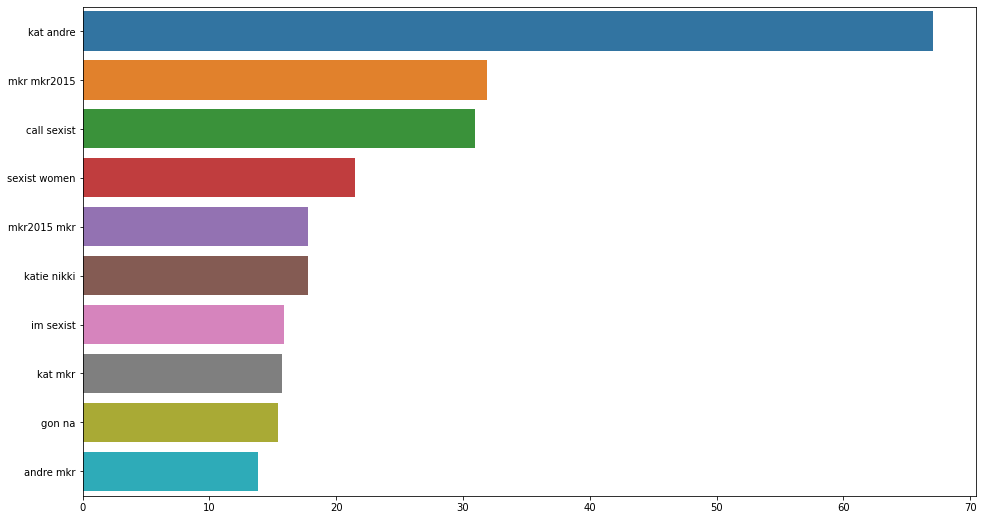

In [28]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def get_top_text_ngrams(corpus, n, g):
    vec = TfidfVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
plt.figure(figsize = (16,9))
frequent_word_bi = get_top_text_ngrams(data.processed_tweet,10,2)
frequent_word_bi = dict(frequent_word_bi)
sns.barplot(x=list(frequent_word_bi.values()),y=list(frequent_word_bi.keys()))

## Trigram Analysis

<AxesSubplot:>

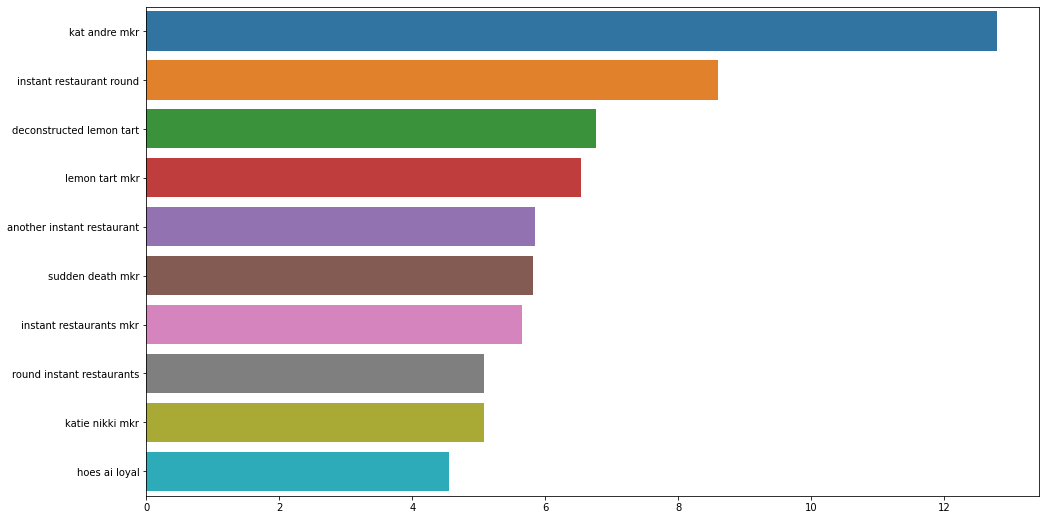

In [29]:
plt.figure(figsize = (16,9))
frequent_word_tri = get_top_text_ngrams(data.processed_tweet,10,3)
frequent_word_tri = dict(frequent_word_tri)
sns.barplot(x=list(frequent_word_tri.values()),y=list(frequent_word_tri.keys()))

# Predictive Analytics

In [30]:
data.columns

Index(['label', 'full_text', 'word counts', 'punct%', 'processed_tweet'], dtype='object')

In [31]:
data.head()

,label,full_text,word counts,punct%,processed_tweet
0,1,So Drasko just said he was impressed the girls...,68,3.7,drasko said impressed girls cooked half chicke...
2,1,Drasko they didn't cook half a bird you idiot ...,35,4.9,drasko n't cook half bird idiot mkr
4,1,Hopefully someone cooks Drasko in the next ep ...,42,2.3,hopefully someone cooks drasko next ep mkr
6,1,of course you were born in serbia...you're as ...,49,8.1,course born serbiayou 're fucked serbian film mkr
7,1,These girls are the equivalent of the irritati...,72,4.9,girls equivalent irritating asian girls couple...


In [32]:
data= data[["full_text","label"]]

In [33]:
data.columns

Index(['full_text', 'label'], dtype='object')

### CREATING THE MODEL

In [34]:
df_x = data['full_text']
df_y = data['label']

In [35]:
corpus = df_x
cv = CountVectorizer()
X = cv.fit_transform(corpus)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, df_y, test_size=0.20, random_state=42)

In [37]:
X_train

<9501x20962 sparse matrix of type '<class 'numpy.int64'>'
	with 129616 stored elements in Compressed Sparse Row format>

In [40]:
# Naive Bayes Classifier classification report
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
NB.fit(X_train, y_train)
predicted = NB.predict(X_test)
report= classification_report(y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.91      0.89      1369
           1       0.87      0.80      0.83      1007

    accuracy                           0.86      2376
   macro avg       0.86      0.85      0.86      2376
weighted avg       0.86      0.86      0.86      2376



In [41]:
# logistic regression classification report
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)
predicted = log.predict(X_test)
report= classification_report(y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1369
           1       0.90      0.80      0.85      1007

    accuracy                           0.88      2376
   macro avg       0.88      0.87      0.87      2376
weighted avg       0.88      0.88      0.88      2376



In [38]:
# Random Forest Classifier classification report
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
predicted = rf.predict(X_test)
report= classification_report(y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      1369
           1       0.92      0.75      0.83      1007

    accuracy                           0.87      2376
   macro avg       0.88      0.85      0.86      2376
weighted avg       0.87      0.87      0.86      2376



In [39]:
# Catbost Classifier classification report
CBC = ctb.CatBoostClassifier()
CBC.fit(X_train, y_train)
predicted = CBC.predict(X_test)
report= classification_report(y_test, predicted)
print(report)

Learning rate set to 0.026943
0:	learn: 0.6791951	total: 386ms	remaining: 6m 25s
1:	learn: 0.6675447	total: 644ms	remaining: 5m 21s
2:	learn: 0.6538466	total: 896ms	remaining: 4m 57s
3:	learn: 0.6438529	total: 1.1s	remaining: 4m 35s
4:	learn: 0.6333286	total: 1.32s	remaining: 4m 23s
5:	learn: 0.6246354	total: 1.54s	remaining: 4m 14s
6:	learn: 0.6135897	total: 1.74s	remaining: 4m 7s
7:	learn: 0.6060717	total: 1.95s	remaining: 4m 2s
8:	learn: 0.5969018	total: 2.17s	remaining: 3m 59s
9:	learn: 0.5891271	total: 2.38s	remaining: 3m 56s
10:	learn: 0.5812133	total: 2.61s	remaining: 3m 54s
11:	learn: 0.5745735	total: 2.84s	remaining: 3m 53s
12:	learn: 0.5676073	total: 3.05s	remaining: 3m 51s
13:	learn: 0.5615289	total: 3.26s	remaining: 3m 49s
14:	learn: 0.5579148	total: 3.47s	remaining: 3m 48s
15:	learn: 0.5523385	total: 3.69s	remaining: 3m 47s
16:	learn: 0.5487195	total: 3.9s	remaining: 3m 45s
17:	learn: 0.5437412	total: 4.11s	remaining: 3m 44s
18:	learn: 0.5371409	total: 4.32s	remaining: 3m 

158:	learn: 0.3952212	total: 34.5s	remaining: 3m 2s
159:	learn: 0.3950547	total: 34.7s	remaining: 3m 2s
160:	learn: 0.3947334	total: 34.9s	remaining: 3m 2s
161:	learn: 0.3943265	total: 35.2s	remaining: 3m 1s
162:	learn: 0.3940178	total: 35.4s	remaining: 3m 1s
163:	learn: 0.3937895	total: 35.6s	remaining: 3m 1s
164:	learn: 0.3934565	total: 35.9s	remaining: 3m 1s
165:	learn: 0.3930872	total: 36.1s	remaining: 3m 1s
166:	learn: 0.3927193	total: 36.4s	remaining: 3m 1s
167:	learn: 0.3923960	total: 36.6s	remaining: 3m 1s
168:	learn: 0.3918879	total: 36.9s	remaining: 3m 1s
169:	learn: 0.3915662	total: 37.1s	remaining: 3m 1s
170:	learn: 0.3912027	total: 37.3s	remaining: 3m
171:	learn: 0.3906966	total: 37.5s	remaining: 3m
172:	learn: 0.3904445	total: 37.7s	remaining: 3m
173:	learn: 0.3901279	total: 38s	remaining: 3m
174:	learn: 0.3898767	total: 38.2s	remaining: 3m
175:	learn: 0.3893531	total: 38.4s	remaining: 2m 59s
176:	learn: 0.3890689	total: 38.6s	remaining: 2m 59s
177:	learn: 0.3887883	total

314:	learn: 0.3567327	total: 1m 7s	remaining: 2m 27s
315:	learn: 0.3565583	total: 1m 8s	remaining: 2m 27s
316:	learn: 0.3563663	total: 1m 8s	remaining: 2m 26s
317:	learn: 0.3562057	total: 1m 8s	remaining: 2m 26s
318:	learn: 0.3559790	total: 1m 8s	remaining: 2m 26s
319:	learn: 0.3558040	total: 1m 8s	remaining: 2m 26s
320:	learn: 0.3556511	total: 1m 9s	remaining: 2m 26s
321:	learn: 0.3554220	total: 1m 9s	remaining: 2m 25s
322:	learn: 0.3552338	total: 1m 9s	remaining: 2m 25s
323:	learn: 0.3550715	total: 1m 9s	remaining: 2m 25s
324:	learn: 0.3548250	total: 1m 9s	remaining: 2m 25s
325:	learn: 0.3546386	total: 1m 10s	remaining: 2m 25s
326:	learn: 0.3543266	total: 1m 10s	remaining: 2m 24s
327:	learn: 0.3541412	total: 1m 10s	remaining: 2m 24s
328:	learn: 0.3539939	total: 1m 10s	remaining: 2m 24s
329:	learn: 0.3538284	total: 1m 11s	remaining: 2m 24s
330:	learn: 0.3536087	total: 1m 11s	remaining: 2m 24s
331:	learn: 0.3534206	total: 1m 11s	remaining: 2m 23s
332:	learn: 0.3532925	total: 1m 11s	rem

467:	learn: 0.3260053	total: 1m 41s	remaining: 1m 54s
468:	learn: 0.3258688	total: 1m 41s	remaining: 1m 54s
469:	learn: 0.3257563	total: 1m 41s	remaining: 1m 54s
470:	learn: 0.3255032	total: 1m 41s	remaining: 1m 54s
471:	learn: 0.3252649	total: 1m 41s	remaining: 1m 53s
472:	learn: 0.3251808	total: 1m 42s	remaining: 1m 53s
473:	learn: 0.3248645	total: 1m 42s	remaining: 1m 53s
474:	learn: 0.3246737	total: 1m 42s	remaining: 1m 53s
475:	learn: 0.3244977	total: 1m 42s	remaining: 1m 53s
476:	learn: 0.3244161	total: 1m 42s	remaining: 1m 52s
477:	learn: 0.3243327	total: 1m 43s	remaining: 1m 52s
478:	learn: 0.3241211	total: 1m 43s	remaining: 1m 52s
479:	learn: 0.3239037	total: 1m 43s	remaining: 1m 52s
480:	learn: 0.3236771	total: 1m 43s	remaining: 1m 51s
481:	learn: 0.3233991	total: 1m 43s	remaining: 1m 51s
482:	learn: 0.3233240	total: 1m 44s	remaining: 1m 51s
483:	learn: 0.3232258	total: 1m 44s	remaining: 1m 51s
484:	learn: 0.3230903	total: 1m 44s	remaining: 1m 51s
485:	learn: 0.3229499	total:

620:	learn: 0.3035304	total: 2m 13s	remaining: 1m 21s
621:	learn: 0.3034425	total: 2m 13s	remaining: 1m 21s
622:	learn: 0.3032154	total: 2m 13s	remaining: 1m 20s
623:	learn: 0.3030542	total: 2m 14s	remaining: 1m 20s
624:	learn: 0.3029336	total: 2m 14s	remaining: 1m 20s
625:	learn: 0.3028720	total: 2m 14s	remaining: 1m 20s
626:	learn: 0.3027620	total: 2m 14s	remaining: 1m 20s
627:	learn: 0.3026359	total: 2m 14s	remaining: 1m 19s
628:	learn: 0.3025630	total: 2m 15s	remaining: 1m 19s
629:	learn: 0.3023665	total: 2m 15s	remaining: 1m 19s
630:	learn: 0.3023050	total: 2m 15s	remaining: 1m 19s
631:	learn: 0.3021711	total: 2m 15s	remaining: 1m 19s
632:	learn: 0.3020259	total: 2m 15s	remaining: 1m 18s
633:	learn: 0.3018941	total: 2m 16s	remaining: 1m 18s
634:	learn: 0.3018339	total: 2m 16s	remaining: 1m 18s
635:	learn: 0.3016621	total: 2m 16s	remaining: 1m 18s
636:	learn: 0.3015837	total: 2m 16s	remaining: 1m 17s
637:	learn: 0.3014328	total: 2m 16s	remaining: 1m 17s
638:	learn: 0.3013732	total:

775:	learn: 0.2860123	total: 2m 46s	remaining: 48.1s
776:	learn: 0.2857851	total: 2m 46s	remaining: 47.8s
777:	learn: 0.2857165	total: 2m 46s	remaining: 47.6s
778:	learn: 0.2856449	total: 2m 47s	remaining: 47.4s
779:	learn: 0.2854880	total: 2m 47s	remaining: 47.2s
780:	learn: 0.2853879	total: 2m 47s	remaining: 47s
781:	learn: 0.2853054	total: 2m 47s	remaining: 46.8s
782:	learn: 0.2852559	total: 2m 47s	remaining: 46.5s
783:	learn: 0.2851148	total: 2m 48s	remaining: 46.3s
784:	learn: 0.2850125	total: 2m 48s	remaining: 46.1s
785:	learn: 0.2849641	total: 2m 48s	remaining: 45.9s
786:	learn: 0.2848355	total: 2m 48s	remaining: 45.7s
787:	learn: 0.2845506	total: 2m 49s	remaining: 45.5s
788:	learn: 0.2843493	total: 2m 49s	remaining: 45.3s
789:	learn: 0.2842602	total: 2m 49s	remaining: 45s
790:	learn: 0.2841970	total: 2m 49s	remaining: 44.8s
791:	learn: 0.2841513	total: 2m 49s	remaining: 44.6s
792:	learn: 0.2841125	total: 2m 50s	remaining: 44.4s
793:	learn: 0.2840417	total: 2m 50s	remaining: 44.

932:	learn: 0.2725238	total: 3m 19s	remaining: 14.3s
933:	learn: 0.2724787	total: 3m 19s	remaining: 14.1s
934:	learn: 0.2724465	total: 3m 20s	remaining: 13.9s
935:	learn: 0.2723585	total: 3m 20s	remaining: 13.7s
936:	learn: 0.2723018	total: 3m 20s	remaining: 13.5s
937:	learn: 0.2722722	total: 3m 20s	remaining: 13.3s
938:	learn: 0.2720837	total: 3m 20s	remaining: 13.1s
939:	learn: 0.2720380	total: 3m 21s	remaining: 12.8s
940:	learn: 0.2719163	total: 3m 21s	remaining: 12.6s
941:	learn: 0.2718404	total: 3m 21s	remaining: 12.4s
942:	learn: 0.2717997	total: 3m 21s	remaining: 12.2s
943:	learn: 0.2717664	total: 3m 21s	remaining: 12s
944:	learn: 0.2716424	total: 3m 22s	remaining: 11.8s
945:	learn: 0.2715786	total: 3m 22s	remaining: 11.6s
946:	learn: 0.2715226	total: 3m 22s	remaining: 11.3s
947:	learn: 0.2714926	total: 3m 22s	remaining: 11.1s
948:	learn: 0.2713791	total: 3m 23s	remaining: 10.9s
949:	learn: 0.2713489	total: 3m 23s	remaining: 10.7s
950:	learn: 0.2712658	total: 3m 23s	remaining: 1

In [40]:
# Decision tree Classifier classification report
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
predicted = DT.predict(X_test)
report= classification_report(y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.91      0.89      1369
           1       0.87      0.81      0.83      1007

    accuracy                           0.86      2376
   macro avg       0.86      0.86      0.86      2376
weighted avg       0.86      0.86      0.86      2376



In [41]:
# Support vector machine classification report
Svm = LinearSVC()
Svm.fit(X_train, y_train)
predicted = Svm.predict(X_test)
report= classification_report(y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.90      0.89      1369
           1       0.86      0.82      0.84      1007

    accuracy                           0.87      2376
   macro avg       0.87      0.86      0.87      2376
weighted avg       0.87      0.87      0.87      2376



In [42]:
# Accuracy of our Model
print("Naives bayes Model",NB.score(X_test,y_test)*100,"%")
print("Logistic regression Model",log.score(X_test,y_test)*100,"%")
print("Random forest Model",rf.score(X_test,y_test)*100,"%")
print("Catboost classifier",CBC.score(X_test,y_test)*100,"%")
print("Decision tree classifier",Svm.score(X_test,y_test)*100,"%")
print("Support vector machine",DT.score(X_test,y_test)*100,"%")

Naives bayes Model 86.36363636363636 %
Logistic regression Model 87.7104377104377 %
Random forest Model 86.57407407407408 %
Catboost classifier 87.33164983164983 %
Decision tree classifier 86.9949494949495 %
Support vector machine 86.44781144781145 %


In [42]:
## Predicting with our model
NB.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [43]:
# Sample Prediciton
comment = ["mad people and so stupid"]
vect = cv.transform(comment).toarray()

In [44]:
NB.predict(vect)

array([1], dtype=int64)

In [45]:
class_dict = {'Non-Bullying':0,'Bullying':1}

In [46]:
class_dict.values()

dict_values([0, 1])

In [47]:
if NB.predict(vect) == 1:
    print("Tweet is Bullying")
else:
    print("Tweet is not Non-Bullying")

Tweet is Bullying


In [48]:
# Sample Prediciton 2
comment1 = ["Great people and nice to hear"]
vect = cv.transform(comment1).toarray()
NB.predict(vect)

array([0], dtype=int64)

In [49]:
if NB.predict(vect) == 1:
    print("Tweet is Bullying")
else:
    print("Tweet is not Non-Bullying")

Tweet is not Non-Bullying


In [51]:
naivebayesML = open("Naives_model.pkl","wb")

In [52]:
import pickle

In [53]:
pickle.dump(NB,naivebayesML)

In [54]:
naivebayesML.close()

In [55]:
cyber_model = open("Naives_model.pkl","rb")

In [56]:
new_model = pickle.load(cyber_model)

In [57]:
# Sample Prediciton 3
comment2 = ["mad people and so stupid"]
vect = cv.transform(comment2).toarray()
new_model.predict(vect)

array([1], dtype=int64)

In [58]:
if new_model.predict(vect) == 1:
    print("Tweet is Bullying")
else:
    print("Tweet is not Non-Bullying")

Tweet is Bullying
